In [1]:
import easyocr
import numpy as np

In [2]:
X = np.load('c:/3rd_project/data/images/movie/X_total_color.npy')
y = np.load('c:/3rd_project/data/images/movie/y_total_color.npy')

In [3]:
X[0]

array([[[245, 255, 255],
        [242, 252, 254],
        [246, 255, 255],
        ...,
        [250, 250, 252],
        [254, 255, 255],
        [254, 255, 255]],

       [[194, 217, 231],
        [197, 220, 233],
        [194, 216, 229],
        ...,
        [245, 245, 247],
        [240, 241, 243],
        [238, 239, 241]],

       [[193, 217, 227],
        [193, 217, 228],
        [194, 216, 227],
        ...,
        [250, 249, 254],
        [249, 250, 252],
        [241, 242, 244]],

       ...,

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]],

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]],

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]]

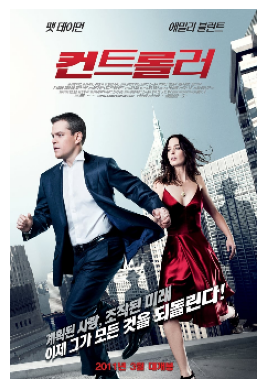

In [4]:
import cv2
from matplotlib import pyplot as plt

num = 52
img = X[num]

# 이미지 표시
plt.imshow(img)
plt.axis("off")
plt.show()

reader = easyocr.Reader(['ko','en'])
result = reader.readtext(X[num])

In [5]:
result

[([[31, 11], [71, 11], [71, 23], [31, 23]], '겨내이면', 0.005863253492861986),
 ([[143, 11], [197, 11], [197, 25], [143, 25]],
  '애밑리 드런트',
  0.08677278131722853),
 ([[39, 33], [189, 33], [189, 69], [39, 69]], '권트물러', 0.19582729041576385),
 ([[100, 264], [146, 264], [146, 296], [100, 296]],
  'm홀물코',
  0.012562813237309456),
 ([[75, 319], [149, 319], [149, 331], [75, 331]],
  '2법 3락 D',
  0.00941963409676745),
 ([[18.461538461538463, 294.3076923076923],
   [149.18301966424815, 240.57752485729787],
   [160.53846153846155, 277.6923076923077],
   [29.81698033575186, 331.4224751427021]],
  'Om버하로존뜻룹-',
  0.0020643126959041325),
 ([[133.01488842937005, 263.701488842937],
   [191.2175890118244, 241.9795300114489],
   [199.98511157062995, 265.298511157063],
   [141.7824109881756, 287.0204699885511]],
  '(굶린다',
  0.05483085289597511)]

In [6]:
len(X)

7005

In [25]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

from konlpy.tag import Kkma

class Ocr:
    def __init__(self, img):
        self.img = img

    def text_detect(self):
        # img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
        reader = easyocr.Reader(['ko', 'en'], gpu = True)
        result = reader.readtext(self.img)

        # img = cv2.resize(img_cv2, (320, 448))
        image = Image.fromarray(self.img)
        font = ImageFont.truetype('C:/Users/tjoeun/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf', 10)
        draw = ImageDraw.Draw(image)
        np.random.seed(42)
        COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")
        for i in result :
            x = i[0][0][0] 
            y = i[0][0][1] 
            w = i[0][1][0] - i[0][0][0] 
            h = i[0][2][1] - i[0][1][1]

            color_idx = random.randint(0,255) 
            color = [int(c) for c in COLORS[color_idx]]

            draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
            draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

        # plt.figure(figsize=(10,20))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        # print(result)

    def image_to_text(self):
        # 추출된 텍스트 영역을 이용하여 각각의 텍스트를 잘라내고 EasyOCR을 다시 적용
        reader = easyocr.Reader(['ko', 'en'], gpu=True)
        result = reader.readtext(self.img)
        
        origin_results = []
        roi_results = []
        roi_gray_results =[]
        roi_2_results =[]
        roi_equal_results =[]
        roi_dil_results =[]
        roi_ero_results =[]
        roi_canny_results =[]

        for (box, text, confidence) in result:
            try:
                origin_results.append(text)
            except:
                pass

            # 각 텍스트 박스의 좌표 추출
            (startX, startY) = box[0]
            (endX, endY) = box[2]
            
            # 좌표를 정수로 변환
            startX, startY, endX, endY = int(startX), int(startY), int(endX), int(endY)

            # print(startX, startY, endX, endY)
            # 좌표가 음수이거나 이미지 범위를 벗어나는 경우 무시
            if startX < 0 or startY < 0 or endX >= self.img.shape[1] or endY >= self.img.shape[0]:
                continue

            # 텍스트 영역 추출
            roi = self.img[startY:endY, startX:endX]

            ############################################# 이미지 전처리 ###################################################

            # 이미지를 그레이스케일로 변환
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

            # 적응형 이진화 수행
            roi_adaptive_thresh = cv2.adaptiveThreshold(roi_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

            # 히스토그램 평탄화 수행
            roi_equalized = cv2.equalizeHist(roi_gray)

            # 팽창
            kernel = np.ones((3, 3), np.uint8)
            roi_dilation = cv2.dilate(roi, kernel, iterations=1)

            # 침식
            kernel = np.ones((3, 3), np.uint8)
            roi_erosion = cv2.erode(roi, kernel, iterations=1)

            # 캐니
            roi_canny = cv2.Canny(roi, 475, 500, apertureSize=3, L2gradient=True)

            ############################################# 텍스트 인식 ###################################################

            # 잘라낸 텍스트 영역에 EasyOCR을 적용
            roi_result = reader.readtext(roi)
            roi_gray_result = reader.readtext(roi_gray)
            roi_2_result = reader.readtext(roi_adaptive_thresh)
            roi_equal_result = reader.readtext(roi_equalized)
            roi_dil_result = reader.readtext(roi_dilation)
            roi_ero_result = reader.readtext(roi_erosion)
            roi_canny_result = reader.readtext(roi_canny)

            ############################################# 결과 출력 ###################################################

            # print("부분")
            # plt.imshow(roi)
            try:
                # print(f'Text: {roi_result[0][1]}, Confidence: {roi_result[0][2]}')
                roi_results.append(roi_result[0][1])
            except:
                # print("Not Detect")
                roi_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("그레이 스케일")
            # plt.imshow(roi_gray, cmap="gray")
            try:
                # print(f'Text: {roi_gray_result[0][1]}, Confidence: {roi_gray_result[0][2]}')
                roi_gray_results.append(roi_gray_result[0][1])
            except:
                # print("Not Detect")
                roi_gray_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("적응형 이진화")
            # plt.imshow(roi_adaptive_thresh, cmap="gray")
            try:
                # print(f'Text: {roi_2_result[0][1]}, Confidence: {roi_2_result[0][2]}')
                roi_2_results.append(roi_2_result[0][1])
            except:
                # print("Not Detect")
                roi_2_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("히스토그램 평탄화")
            # plt.imshow(roi_equalized)
            try:
                # print(f'Text: {roi_equal_result[0][1]}, Confidence: {roi_equal_result[0][2]}')
                roi_equal_results.append(roi_equal_result[0][1])
            except:
                # print("Not Detect")
                roi_equal_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("팽창")
            # plt.imshow(roi_dilation)
            try:
                # print(f'Text: {roi_dil_result[0][1]}, Confidence: {roi_dil_result[0][2]}')
                roi_dil_results.append(roi_dil_result[0][1])
            except:
                # print("Not Detect")
                roi_dil_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("침식")
            # plt.imshow(roi_erosion)
            try:
                # print(f'Text: {roi_ero_result[0][1]}, Confidence: {roi_ero_result[0][2]}')
                roi_ero_results.append(roi_ero_result[0][1])
            except:
                # print("Not Detect")
                roi_ero_results.append('None')
            # plt.axis('off')
            # plt.show()

            # print("캐니")
            # plt.imshow(roi_canny)
            try:
                # print(f'Text: {roi_canny_result[0][1]}, Confidence: {roi_canny_result[0][2]}')
                roi_canny_results.append(roi_canny_result[0][1])
            except:
                # print("Not Detect")
                roi_canny_results.append('None')
            # plt.axis('off')
            # plt.show()
        return origin_results, roi_results, roi_gray_results, roi_2_results, roi_equal_results, roi_dil_results, roi_ero_results, roi_canny_results


class Get_Nouns:
    def __init__(self, i2t_text):
        self.text = i2t_text

    def get_nouns(self):
        kkma = Kkma()
        nouns = kkma.nouns(str(self.text))
        return nouns

    def get_nouns_list(self):
        i2t_nouns = self.get_nouns()

        noun_list = []

        # 추출된 명사 출력
        for i2t_noun in i2t_nouns:
            if len(i2t_noun) > 1:
                noun_list.append(i2t_noun)

        noun_list = list(set(noun_list))
        return noun_list

### 장르별 단어 txt파일 생성

In [8]:
# from tqdm import tqdm

# act_nouns = []
# ani_nouns = []
# com_nouns = []
# dra_nouns = []
# hor_nouns = []
# etc_nouns = []

# for num in tqdm(range(len(X))):
#     img = X[num]

#     try:
#         ocr = Ocr(img)
#         # ocr.text_detect()
#         i2t_text = ocr.image_to_text()
#         # print(y[num])
#         gn = Get_Nouns(i2t_text)
#         nouns = gn.get_nouns_list()
#         nouns = list(set(nouns))
#     except:
#         print(num)

#     if y[num] == '액션':
#         for noun in nouns:
#             act_nouns.append(noun)
#     elif y[num] == '애니메이션':
#         for noun in nouns:
#             ani_nouns.append(noun)
#     elif y[num] == '코미디':
#         for noun in nouns:
#             com_nouns.append(noun)
#     elif y[num] == '드라마':
#         for noun in nouns:
#             dra_nouns.append(noun)
#     elif y[num] == '공포(호러)':
#         for noun in nouns:
#             hor_nouns.append(noun)
#     else:
#         for noun in nouns:
#             etc_nouns.append(noun)

In [9]:
# print(act_nouns)
# print(ani_nouns)
# print(com_nouns)
# print(dra_nouns)
# print(hor_nouns)
# print(etc_nouns)

In [10]:
# act_nouns = list(set(act_nouns))
# ani_nouns = list(set(ani_nouns))
# com_nouns = list(set(com_nouns))
# dra_nouns = list(set(dra_nouns))
# hor_nouns = list(set(hor_nouns))
# etc_nouns = list(set(etc_nouns))

# print(len(act_nouns))
# print(len(ani_nouns))
# print(len(com_nouns))
# print(len(dra_nouns))
# print(len(hor_nouns))
# print(len(etc_nouns))

In [11]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# genre = ['액션', '애니매이션', '코미디', '드라마', '공포(호러)', '기타']

# # 문서 코퍼스 생성
# corpus = [
#     ' '.join(act_nouns),
#     ' '.join(ani_nouns),
#     ' '.join(com_nouns),
#     ' '.join(dra_nouns),
#     ' '.join(hor_nouns),
#     ' '.join(etc_nouns)
# ]

# # TF-IDF 벡터화
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# # 입력 단어
# input_word = '감동'

# # 입력 단어를 TF-IDF 벡터로 변환
# input_vector = tfidf_vectorizer.transform([input_word])

# # 각 카테고리와의 코사인 유사도 계산
# similarities = cosine_similarity(input_vector, tfidf_matrix)

# print(similarities)
# print(similarities.argmax())
# # 유사도가 가장 높은 카테고리 선택
# most_similar_category = genre[similarities.argmax()]

# # 결과 출력
# print(f"입력 단어 '{input_word}'와(과) 가장 유사한 카테고리: {most_similar_category}")

In [ ]:
# act_nouns
# ani_nouns
# com_nouns
# dra_nouns
# hor_nouns
# etc_nouns 

# 리스트를 텍스트 파일로 저장
# with open('c:/3rd_project/data/etc_nouns.txt', 'w', encoding='utf-8') as f:
#     for item in etc_nouns:
#         f.write("%s\n" % item)

### 장르별 단어 txt파일 불러오기

In [12]:
def read_words_from_file(file_path):
    words = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # 줄바꿈 문자를 제거하고 단어를 리스트에 추가
            word = line.strip()
            words.append(word)
    return words

# 파일로부터 단어 리스트 불러오기
act_nouns = read_words_from_file('c:/3rd_project/data/act_nouns.txt')
ani_nouns = read_words_from_file('c:/3rd_project/data/ani_nouns.txt')
com_nouns = read_words_from_file('c:/3rd_project/data/com_nouns.txt')
dra_nouns = read_words_from_file('c:/3rd_project/data/dra_nouns.txt')
hor_nouns = read_words_from_file('c:/3rd_project/data/hor_nouns.txt')
etc_nouns = read_words_from_file('c:/3rd_project/data/etc_nouns.txt')

# 장르별 단어 빈도수

In [26]:
from collections import Counter

num = 2608
img = X[num]
genre = y[num]

# 이미지 텍스트 추출
ocr = Ocr(img)
# ocr.text_detect()
i2t_text = ocr.image_to_text()
# print(y[num])
gn = Get_Nouns(i2t_text)
nouns = gn.get_nouns_list()

act_freq = 0
ani_freq = 0
com_freq = 0
dra_freq = 0
hor_freq = 0
etc_freq = 0

print(len(nouns))

# 입력한 단어들의 빈도수 확인
for word in nouns:
    if word in act_nouns:
        print(f"액션 단어 : {word}")
        act_freq += 1
    elif word in ani_nouns:
        print(f"애니 단어 : {word}")
        ani_freq += 1
    elif word in com_nouns:
        print(f"코미디 단어 : {word}")
        com_freq += 1
    elif word in dra_nouns:
        print(f"드라마 단어 : {word}")
        dra_freq += 1
    elif word in hor_nouns:
        print(f"공포 단어 : {word}")
        hor_freq += 1
    else:
        print(f"기타 단어 : {word}")
        etc_freq += 1

print(f"장르 : {genre}")
print(f"액션 장르의 빈도수: {act_freq}")
print(f"애니메이션 장르의 빈도수: {ani_freq}")
print(f"코미디 장르의 빈도수: {com_freq}")
print(f"드라마 장르의 빈도수: {dra_freq}")
print(f"공포(호러) 장르의 빈도수: {hor_freq}")
print(f"기타 장르의 빈도수: {etc_freq}")

25
코미디 단어 : 함미
액션 단어 : 고드
액션 단어 : 매거
애니 단어 : 시해
액션 단어 : 초대
드라마 단어 : 닥기베미
드라마 단어 : 당근백거
드라마 단어 : 린립란
액션 단어 : 그이
액션 단어 : 기미
액션 단어 : 로그
액션 단어 : 미밀
드라마 단어 : 달시해
드라마 단어 : 위협단
액션 단어 : 위협
드라마 단어 : 탁시
액션 단어 : 미온
코미디 단어 : 1밑
드라마 단어 : 잔미온
드라마 단어 : 탓미온
액션 단어 : 로인
드라마 단어 : 승대
애니 단어 : 무빚
드라마 단어 : 당근
드라마 단어 : 로그인
장르 : 드라마
액션 장르의 빈도수: 10
애니메이션 장르의 빈도수: 2
코미디 장르의 빈도수: 2
드라마 장르의 빈도수: 11
공포(호러) 장르의 빈도수: 0
기타 장르의 빈도수: 0


In [24]:
from collections import Counter

num = 2608
img = X[num]
genre = y[num]

# 이미지 텍스트 추출
ocr = Ocr(img)
# ocr.text_detect()
i2t_text = ocr.image_to_text()
# print(y[num])
gn = Get_Nouns(i2t_text)
nouns = gn.get_nouns_list()

act_freq = 0
ani_freq = 0
com_freq = 0
dra_freq = 0
hor_freq = 0
etc_freq = 0

print(len(nouns))

# 입력한 단어들의 빈도수 확인
for word in nouns:
    if word in act_nouns:
        print(f"액션 단어 : {word}")
        act_freq += 1
    elif word in ani_nouns:
        print(f"애니 단어 : {word}")
        ani_freq += 1
    elif word in com_nouns:
        print(f"코미디 단어 : {word}")
        com_freq += 1
    elif word in dra_nouns:
        print(f"드라마 단어 : {word}")
        dra_freq += 1
    elif word in hor_nouns:
        print(f"공포 단어 : {word}")
        hor_freq += 1
    else:
        print(f"기타 단어 : {word}")
        etc_freq += 1

print(f"장르 : {genre}")
print(f"액션 장르의 빈도수: {act_freq}")
print(f"애니메이션 장르의 빈도수: {ani_freq}")
print(f"코미디 장르의 빈도수: {com_freq}")
print(f"드라마 장르의 빈도수: {dra_freq}")
print(f"공포(호러) 장르의 빈도수: {hor_freq}")
print(f"기타 장르의 빈도수: {etc_freq}")

26
액션 단어 : 그이
애니 단어 : 무빚
드라마 단어 : 달시해
애니 단어 : 시해
액션 단어 : 기미
드라마 단어 : 승대
액션 단어 : 미밀
드라마 단어 : 탁시
드라마 단어 : 닥기베미
코미디 단어 : 함미
드라마 단어 : 승대
액션 단어 : 고드
코미디 단어 : 1밑
액션 단어 : 매거
드라마 단어 : 탓미온
액션 단어 : 미온
드라마 단어 : 린립란
액션 단어 : 초대
액션 단어 : 로그
드라마 단어 : 로그인
드라마 단어 : 당근
드라마 단어 : 당근백거
드라마 단어 : 잔미온
액션 단어 : 위협
드라마 단어 : 위협단
액션 단어 : 로인
장르 : 드라마
액션 장르의 빈도수: 10
애니메이션 장르의 빈도수: 2
코미디 장르의 빈도수: 2
드라마 장르의 빈도수: 12
공포(호러) 장르의 빈도수: 0
기타 장르의 빈도수: 0


In [27]:
import pandas as pd

columns = ['act_freq', 'ani_freq', 'com_freq', 'dra_freq', 'hor_freq', 'etc_freq']
df = pd.DataFrame(columns=columns)
df

,act_freq,ani_freq,com_freq,dra_freq,hor_freq,etc_freq


In [28]:
from collections import Counter
from tqdm import tqdm

for num in tqdm(range(len(X))):
    img = X[num]
    genre = y[num]

    try:
        # 이미지 텍스트 추출
        ocr = Ocr(img)
        # ocr.text_detect()
        i2t_text = ocr.image_to_text()
        # print(y[num])
        gn = Get_Nouns(i2t_text)
        nouns = gn.get_nouns_list()

        act_freq = 0
        ani_freq = 0
        com_freq = 0
        dra_freq = 0
        hor_freq = 0
        etc_freq = 0

        # 입력한 단어들의 빈도수 확인
        for word in nouns:
            if word in act_nouns:
                act_freq += 1
            elif word in ani_nouns:
                ani_freq += 1
            elif word in com_nouns:
                com_freq += 1
            elif word in dra_nouns:
                dra_freq += 1
            elif word in hor_nouns:
                hor_freq += 1
            else:
                etc_freq += 1

        df.loc[num, 'act_freq'] = act_freq
        df.loc[num, 'ani_freq'] = ani_freq
        df.loc[num, 'com_freq'] = com_freq
        df.loc[num, 'dra_freq'] = dra_freq
        df.loc[num, 'hor_freq'] = hor_freq
        df.loc[num, 'etc_freq'] = etc_freq

    except:
        print(num)
        df.loc[num, 'act_freq'] = 0
        df.loc[num, 'ani_freq'] = 0
        df.loc[num, 'com_freq'] = 0
        df.loc[num, 'dra_freq'] = 0
        df.loc[num, 'hor_freq'] = 0
        df.loc[num, 'etc_freq'] = 0

    df.to_csv("c:/3rd_project/data/Train/freq_fix_1010.csv", index=None)
df

  1%|          | 53/7005 [02:52<6:49:08,  3.53s/it]

52


  1%|▏         | 104/7005 [05:28<4:54:55,  2.56s/it]

103


  2%|▏         | 123/7005 [06:22<5:02:15,  2.64s/it]

122


  3%|▎         | 184/7005 [09:16<4:58:17,  2.62s/it]

183


  4%|▍         | 304/7005 [15:10<5:40:19,  3.05s/it]

303


  5%|▍         | 318/7005 [15:50<5:35:06,  3.01s/it]

317


  5%|▍         | 323/7005 [16:06<5:43:01,  3.08s/it]

322


  5%|▌         | 354/7005 [17:48<6:21:23,  3.44s/it]

353


  5%|▌         | 365/7005 [18:25<6:28:46,  3.51s/it]

364


  6%|▌         | 391/7005 [19:56<6:45:45,  3.68s/it]

390


  6%|▌         | 417/7005 [21:22<5:45:15,  3.14s/it]

416


  6%|▌         | 418/7005 [21:25<5:38:51,  3.09s/it]

417


  6%|▌         | 426/7005 [21:53<6:35:12,  3.60s/it]

425


  6%|▋         | 446/7005 [23:02<6:33:42,  3.60s/it]

445


  6%|▋         | 455/7005 [23:32<6:29:59,  3.57s/it]

454


  7%|▋         | 521/7005 [27:10<5:47:41,  3.22s/it]

520


  7%|▋         | 525/7005 [27:23<5:53:19,  3.27s/it]

524


  8%|▊         | 532/7005 [27:47<5:48:21,  3.23s/it]

531


  8%|▊         | 542/7005 [28:23<6:31:52,  3.64s/it]

541


  8%|▊         | 575/7005 [30:15<6:22:06,  3.57s/it]

574


  8%|▊         | 585/7005 [30:50<5:43:45,  3.21s/it]

584


  8%|▊         | 593/7005 [31:17<5:46:16,  3.24s/it]

592


 10%|▉         | 700/7005 [37:11<5:22:42,  3.07s/it]

699


 11%|█         | 738/7005 [39:21<5:52:38,  3.38s/it]

737


 11%|█         | 760/7005 [40:38<5:54:45,  3.41s/it]

759


 11%|█▏        | 792/7005 [42:27<5:42:56,  3.31s/it]

791


 12%|█▏        | 811/7005 [43:34<5:49:30,  3.39s/it]

810


 12%|█▏        | 827/7005 [44:31<5:38:55,  3.29s/it]

826


 12%|█▏        | 835/7005 [45:01<5:48:33,  3.39s/it]

834


 12%|█▏        | 852/7005 [45:59<5:19:38,  3.12s/it]

851


 12%|█▏        | 859/7005 [46:20<5:01:01,  2.94s/it]

858


 13%|█▎        | 927/7005 [50:23<5:18:33,  3.14s/it]

926


 14%|█▍        | 965/7005 [52:35<5:57:04,  3.55s/it]

965


 14%|█▍        | 993/7005 [54:16<5:50:35,  3.50s/it]

992


 15%|█▍        | 1018/7005 [55:42<5:46:06,  3.47s/it]

1017


 15%|█▍        | 1020/7005 [55:48<5:45:22,  3.46s/it]

1019


 16%|█▌        | 1096/7005 [1:00:02<5:11:41,  3.16s/it]

1095


 16%|█▌        | 1130/7005 [1:01:44<5:10:26,  3.17s/it]

1129


 16%|█▋        | 1154/7005 [1:03:08<5:19:45,  3.28s/it]

1153


 17%|█▋        | 1203/7005 [1:06:01<5:21:46,  3.33s/it]

1202


 17%|█▋        | 1224/7005 [1:07:16<5:43:55,  3.57s/it]

1223


 18%|█▊        | 1237/7005 [1:08:02<5:34:10,  3.48s/it]

1236


 18%|█▊        | 1240/7005 [1:08:14<6:03:42,  3.79s/it]

1239


 18%|█▊        | 1276/7005 [1:10:18<5:14:34,  3.29s/it]

1275


 18%|█▊        | 1286/7005 [1:10:53<5:32:51,  3.49s/it]

1285


 19%|█▉        | 1333/7005 [1:13:41<5:25:57,  3.45s/it]

1332


 19%|█▉        | 1334/7005 [1:13:43<5:12:14,  3.30s/it]

1333


 19%|█▉        | 1335/7005 [1:13:46<5:03:35,  3.21s/it]

1334


 20%|█▉        | 1383/7005 [1:16:38<6:02:47,  3.87s/it]

1382


 20%|█▉        | 1385/7005 [1:16:45<5:56:33,  3.81s/it]

1384


 20%|█▉        | 1390/7005 [1:17:04<5:41:46,  3.65s/it]

1389


 20%|██        | 1422/7005 [1:19:01<5:20:16,  3.44s/it]

1421


 20%|██        | 1436/7005 [1:19:54<5:28:58,  3.54s/it]

1435


 21%|██        | 1467/7005 [1:21:50<5:38:59,  3.67s/it]

1466


 21%|██        | 1479/7005 [1:22:34<5:07:46,  3.34s/it]

1478


 21%|██▏       | 1492/7005 [1:23:21<5:31:31,  3.61s/it]

1491


 22%|██▏       | 1542/7005 [1:26:23<5:22:15,  3.54s/it]

1541


 23%|██▎       | 1609/7005 [1:30:28<5:12:51,  3.48s/it]

1608


 24%|██▍       | 1698/7005 [1:35:39<4:41:27,  3.18s/it]

1697


 24%|██▍       | 1705/7005 [1:36:05<5:05:07,  3.45s/it]

1704


 24%|██▍       | 1706/7005 [1:36:09<5:06:48,  3.47s/it]

1705


 25%|██▍       | 1731/7005 [1:37:38<5:27:35,  3.73s/it]

1730


 25%|██▍       | 1739/7005 [1:38:07<5:31:40,  3.78s/it]

1738


 25%|██▍       | 1745/7005 [1:38:30<5:45:17,  3.94s/it]

1744


 25%|██▌       | 1776/7005 [1:40:24<4:37:37,  3.19s/it]

1775


 25%|██▌       | 1778/7005 [1:40:30<4:49:03,  3.32s/it]

1777


 25%|██▌       | 1779/7005 [1:40:33<4:40:14,  3.22s/it]

1778


 25%|██▌       | 1780/7005 [1:40:37<4:46:29,  3.29s/it]

1779


 26%|██▌       | 1795/7005 [1:41:28<5:03:26,  3.49s/it]

1794


 26%|██▌       | 1801/7005 [1:41:50<5:02:22,  3.49s/it]

1800


 26%|██▌       | 1825/7005 [1:43:18<5:20:12,  3.71s/it]

1824


 27%|██▋       | 1923/7005 [1:49:00<4:45:11,  3.37s/it]

1922


 28%|██▊       | 1953/7005 [1:50:44<4:26:53,  3.17s/it]

1952


 28%|██▊       | 1960/7005 [1:51:07<4:35:48,  3.28s/it]

1959


 28%|██▊       | 1990/7005 [1:52:49<4:27:01,  3.19s/it]

1989


 29%|██▊       | 1999/7005 [1:53:19<4:32:13,  3.26s/it]

1998


 29%|██▉       | 2017/7005 [1:54:19<4:20:52,  3.14s/it]

2016


 29%|██▉       | 2018/7005 [1:54:22<4:28:57,  3.24s/it]

2017


 31%|███       | 2137/7005 [2:01:08<4:43:46,  3.50s/it]

2136


 32%|███▏      | 2265/7005 [2:08:22<4:41:29,  3.56s/it]

2264


 32%|███▏      | 2267/7005 [2:08:28<4:10:45,  3.18s/it]

2266


 34%|███▎      | 2348/7005 [2:13:02<4:23:12,  3.39s/it]

2347


 34%|███▎      | 2362/7005 [2:13:48<4:34:15,  3.54s/it]

2361


 34%|███▍      | 2368/7005 [2:14:10<4:29:07,  3.48s/it]

2367


 35%|███▍      | 2451/7005 [2:18:51<4:04:42,  3.22s/it]

2450


 35%|███▌      | 2472/7005 [2:20:01<4:08:28,  3.29s/it]

2471


 35%|███▌      | 2483/7005 [2:20:38<3:57:57,  3.16s/it]

2482


 36%|███▌      | 2495/7005 [2:21:17<4:02:53,  3.23s/it]

2494


 36%|███▌      | 2506/7005 [2:21:55<4:25:08,  3.54s/it]

2505


 37%|███▋      | 2589/7005 [2:26:33<4:06:57,  3.36s/it]

2588


 38%|███▊      | 2638/7005 [2:29:18<4:07:39,  3.40s/it]

2637


 39%|███▉      | 2748/7005 [2:35:24<4:01:41,  3.41s/it]

2747


 40%|████      | 2809/7005 [2:38:46<3:45:07,  3.22s/it]

2808


 41%|████      | 2850/7005 [2:41:01<3:56:48,  3.42s/it]

2849


 41%|████      | 2863/7005 [2:41:45<3:52:07,  3.36s/it]

2862


 41%|████      | 2872/7005 [2:42:14<3:32:51,  3.09s/it]

2871


 42%|████▏     | 2926/7005 [2:45:17<3:35:44,  3.17s/it]

2925


 42%|████▏     | 2952/7005 [2:46:44<3:42:42,  3.30s/it]

2951


 42%|████▏     | 2965/7005 [2:47:28<3:49:26,  3.41s/it]

2964


 43%|████▎     | 2998/7005 [2:49:17<3:42:36,  3.33s/it]

2997


 43%|████▎     | 3012/7005 [2:50:04<3:43:50,  3.36s/it]

3011


 43%|████▎     | 3032/7005 [2:51:11<3:28:59,  3.16s/it]

3031


 44%|████▍     | 3066/7005 [2:53:06<3:25:59,  3.14s/it]

3065


 44%|████▍     | 3085/7005 [2:54:11<3:28:53,  3.20s/it]

3084


 44%|████▍     | 3106/7005 [2:55:17<3:18:51,  3.06s/it]

3105


 45%|████▍     | 3141/7005 [2:57:13<3:33:29,  3.32s/it]

3140


 45%|████▌     | 3164/7005 [2:58:29<3:23:38,  3.18s/it]

3163


 46%|████▌     | 3194/7005 [3:00:10<3:33:16,  3.36s/it]

3193


 47%|████▋     | 3262/7005 [3:03:56<3:20:10,  3.21s/it]

3261


 47%|████▋     | 3280/7005 [3:04:53<3:13:19,  3.11s/it]

3279


 47%|████▋     | 3321/7005 [3:07:07<3:35:45,  3.51s/it]

3320


 48%|████▊     | 3345/7005 [3:08:24<3:01:17,  2.97s/it]

3344


 48%|████▊     | 3375/7005 [3:10:00<2:58:36,  2.95s/it]

3374


 48%|████▊     | 3389/7005 [3:10:46<2:55:44,  2.92s/it]

3388


 49%|████▉     | 3435/7005 [3:13:24<3:14:34,  3.27s/it]

3434


 50%|█████     | 3519/7005 [3:18:09<3:16:54,  3.39s/it]

3518


 50%|█████     | 3529/7005 [3:18:44<3:34:51,  3.71s/it]

3528


 50%|█████     | 3530/7005 [3:18:48<3:31:07,  3.65s/it]

3529


 51%|█████     | 3547/7005 [3:19:44<3:23:04,  3.52s/it]

3546


 51%|█████     | 3549/7005 [3:19:51<3:23:54,  3.54s/it]

3548


 51%|█████     | 3567/7005 [3:20:53<3:09:51,  3.31s/it]

3566


 51%|█████▏    | 3596/7005 [3:22:30<3:17:02,  3.47s/it]

3595


 51%|█████▏    | 3598/7005 [3:22:38<3:17:48,  3.48s/it]

3597


 52%|█████▏    | 3608/7005 [3:23:11<3:05:23,  3.27s/it]

3607


 52%|█████▏    | 3623/7005 [3:24:01<3:11:07,  3.39s/it]

3622


 52%|█████▏    | 3625/7005 [3:24:09<3:21:51,  3.58s/it]

3624


 52%|█████▏    | 3642/7005 [3:25:03<2:53:33,  3.10s/it]

3641


 53%|█████▎    | 3682/7005 [3:27:10<2:52:26,  3.11s/it]

3681


 54%|█████▎    | 3752/7005 [3:31:03<2:40:48,  2.97s/it]

3751


 54%|█████▍    | 3781/7005 [3:32:36<2:57:06,  3.30s/it]

3780


 54%|█████▍    | 3783/7005 [3:32:42<2:50:40,  3.18s/it]

3782


 55%|█████▍    | 3841/7005 [3:35:58<2:59:05,  3.40s/it]

3840


 55%|█████▌    | 3865/7005 [3:37:16<2:57:25,  3.39s/it]

3864


 57%|█████▋    | 3964/7005 [3:42:39<2:32:33,  3.01s/it]

3963


 57%|█████▋    | 3970/7005 [3:43:00<2:49:45,  3.36s/it]

3969


 57%|█████▋    | 3993/7005 [3:44:17<2:47:39,  3.34s/it]

3992


 58%|█████▊    | 4044/7005 [3:47:05<2:46:23,  3.37s/it]

4043


 58%|█████▊    | 4090/7005 [3:49:37<2:32:00,  3.13s/it]

4089


 59%|█████▊    | 4112/7005 [3:50:51<2:32:14,  3.16s/it]

4111


 60%|█████▉    | 4173/7005 [3:54:11<2:38:38,  3.36s/it]

4172


 60%|█████▉    | 4174/7005 [3:54:16<2:59:15,  3.80s/it]

4173


 60%|█████▉    | 4184/7005 [3:54:53<2:44:06,  3.49s/it]

4183


 61%|██████    | 4273/7005 [3:59:52<2:45:36,  3.64s/it]

4272


 61%|██████    | 4285/7005 [4:00:29<2:16:34,  3.01s/it]

4284


 61%|██████▏   | 4292/7005 [4:00:55<2:26:43,  3.24s/it]

4291


 62%|██████▏   | 4310/7005 [4:01:53<2:25:06,  3.23s/it]

4309


 62%|██████▏   | 4313/7005 [4:02:03<2:27:49,  3.29s/it]

4312


 62%|██████▏   | 4315/7005 [4:02:10<2:27:06,  3.28s/it]

4314


 62%|██████▏   | 4327/7005 [4:02:50<2:29:51,  3.36s/it]

4326


 62%|██████▏   | 4354/7005 [4:04:14<2:18:42,  3.14s/it]

4353


 63%|██████▎   | 4397/7005 [4:06:37<2:17:05,  3.15s/it]

4396


 63%|██████▎   | 4422/7005 [4:08:01<2:27:23,  3.42s/it]

4421


 63%|██████▎   | 4423/7005 [4:08:04<2:23:38,  3.34s/it]

4422


 63%|██████▎   | 4427/7005 [4:08:17<2:13:57,  3.12s/it]

4426


 64%|██████▍   | 4503/7005 [4:12:29<2:21:22,  3.39s/it]

4502


 67%|██████▋   | 4696/7005 [4:23:03<2:12:54,  3.45s/it]

4695


 67%|██████▋   | 4720/7005 [4:24:21<2:01:55,  3.20s/it]

4719


 68%|██████▊   | 4731/7005 [4:24:58<2:02:02,  3.22s/it]

4730


 68%|██████▊   | 4780/7005 [4:27:40<2:09:23,  3.49s/it]

4779


 69%|██████▉   | 4835/7005 [4:30:45<2:04:34,  3.44s/it]

4834


 70%|██████▉   | 4871/7005 [4:32:45<1:53:56,  3.20s/it]

4870


 70%|██████▉   | 4879/7005 [4:33:11<1:49:19,  3.09s/it]

4878


 70%|██████▉   | 4884/7005 [4:33:30<2:10:08,  3.68s/it]

4883


 70%|███████   | 4928/7005 [4:35:57<1:48:40,  3.14s/it]

4927


 73%|███████▎  | 5100/7005 [4:45:21<1:46:09,  3.34s/it]

5099


 73%|███████▎  | 5146/7005 [4:47:49<1:41:51,  3.29s/it]

5145


 74%|███████▍  | 5207/7005 [4:51:09<1:41:21,  3.38s/it]

5206


 76%|███████▌  | 5338/7005 [4:58:20<1:27:00,  3.13s/it]

5337


 77%|███████▋  | 5394/7005 [5:01:21<1:24:27,  3.15s/it]

5393


 77%|███████▋  | 5395/7005 [5:01:25<1:24:35,  3.15s/it]

5394


 79%|███████▉  | 5562/7005 [5:10:24<1:13:39,  3.06s/it]

5561


 80%|███████▉  | 5586/7005 [5:11:40<1:11:07,  3.01s/it]

5585


 80%|███████▉  | 5592/7005 [5:12:02<1:26:21,  3.67s/it]

5591


 80%|████████  | 5620/7005 [5:13:32<1:16:22,  3.31s/it]

5619


 80%|████████  | 5633/7005 [5:14:13<1:13:31,  3.22s/it]

5632


 80%|████████  | 5638/7005 [5:14:30<1:15:30,  3.31s/it]

5637


 81%|████████  | 5650/7005 [5:15:07<1:10:44,  3.13s/it]

5649


 81%|████████  | 5669/7005 [5:16:04<1:05:15,  2.93s/it]

5668


 81%|████████  | 5676/7005 [5:16:28<1:12:04,  3.25s/it]

5675


 81%|████████▏ | 5695/7005 [5:17:31<1:15:12,  3.44s/it]

5694


 81%|████████▏ | 5705/7005 [5:18:01<1:06:45,  3.08s/it]

5704


 82%|████████▏ | 5712/7005 [5:18:22<1:04:15,  2.98s/it]

5711


 82%|████████▏ | 5714/7005 [5:18:28<1:04:34,  3.00s/it]

5713


 82%|████████▏ | 5772/7005 [5:21:42<1:07:07,  3.27s/it]

5771


 82%|████████▏ | 5776/7005 [5:21:55<1:05:20,  3.19s/it]

5775


 83%|████████▎ | 5845/7005 [5:25:28<1:02:52,  3.25s/it]

5844


 84%|████████▎ | 5850/7005 [5:25:46<1:05:36,  3.41s/it]

5849


 84%|████████▎ | 5852/7005 [5:25:53<1:06:12,  3.45s/it]

5851


 84%|████████▍ | 5876/7005 [5:27:07<57:39,  3.06s/it]  

5875


 84%|████████▍ | 5904/7005 [5:28:34<54:25,  2.97s/it]  

5903


 85%|████████▍ | 5929/7005 [5:29:48<51:21,  2.86s/it]  

5928


 86%|████████▌ | 6038/7005 [5:35:26<50:55,  3.16s/it]  

6037


 87%|████████▋ | 6100/7005 [5:38:48<44:08,  2.93s/it]

6099


 88%|████████▊ | 6156/7005 [5:41:47<48:18,  3.41s/it]

6155


 90%|████████▉ | 6284/7005 [5:48:37<40:39,  3.38s/it]

6283


 92%|█████████▏| 6453/7005 [5:57:32<29:25,  3.20s/it]

6452


 93%|█████████▎| 6482/7005 [5:59:03<27:41,  3.18s/it]

6481


 93%|█████████▎| 6528/7005 [6:01:33<25:53,  3.26s/it]

6527


 94%|█████████▎| 6560/7005 [6:03:13<22:47,  3.07s/it]

6559


 94%|█████████▎| 6562/7005 [6:03:19<22:16,  3.02s/it]

6561


 94%|█████████▎| 6563/7005 [6:03:22<22:44,  3.09s/it]

6562


 94%|█████████▍| 6603/7005 [6:05:31<20:07,  3.00s/it]

6602


 95%|█████████▍| 6638/7005 [6:07:23<18:43,  3.06s/it]

6637


 95%|█████████▌| 6656/7005 [6:08:22<19:49,  3.41s/it]

6655


 95%|█████████▌| 6670/7005 [6:09:06<18:35,  3.33s/it]

6669


 95%|█████████▌| 6686/7005 [6:09:57<16:50,  3.17s/it]

6685


 97%|█████████▋| 6780/7005 [6:15:10<12:12,  3.26s/it]

6779


 97%|█████████▋| 6813/7005 [6:17:00<10:46,  3.36s/it]

6812


 97%|█████████▋| 6822/7005 [6:17:30<10:41,  3.50s/it]

6821


 98%|█████████▊| 6854/7005 [6:19:15<08:03,  3.20s/it]

6853


 99%|█████████▉| 6942/7005 [6:23:57<03:08,  2.99s/it]

6941


100%|█████████▉| 6978/7005 [6:25:49<01:24,  3.12s/it]

6977


100%|██████████| 7005/7005 [6:27:13<00:00,  3.32s/it]


,act_freq,ani_freq,com_freq,dra_freq,hor_freq,etc_freq
0,7,5,0,0,0,0
1,0,4,0,0,0,0
2,15,0,14,0,0,0
3,1,0,0,1,0,0
4,1,0,1,0,0,0
...,...,...,...,...,...,...
7000,4,1,1,2,0,0
7001,3,0,1,0,0,3
7002,0,0,0,0,0,0
7003,19,37,0,0,0,0
